In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
# %matplotlib notebook
# %matplotlib notebook
#mpld3.enable_notebook()
import mpld3
import matplotlib.pyplot as plt
# Set up useful plot dimensions and scroll enable #
plt.rcParams["figure.figsize"] = [12, 7]


In [2]:
unique_index = 0

In [3]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir("../datasets/") if isfile(join("../datasets/", f))]
filename = "../datasets/" + onlyfiles[unique_index]
unique_index += 1


### Parse through the file, and create a pandas DataFrame database style table to hold all event information

In [4]:
import transform 
import read_log_file as readlog
#filename = "datasets/stress_log.3"
# filename = "/Users/ellisbrown/Desktop/Project/datasets/long_amzn_workload.log"

database_table = readlog.get_parsed_data_from_file(filename)

# print(database_table)

### Seperate the stop the world and concurrent events for analysis
### Then, for each event name, create a list of all corresponding data tables

In [5]:
stw_table, concurrent_table = transform.seperate_pauses_concurrent(database_table)
stw_seperated_tables = transform.seperate_by_event_name(stw_table)
concurrent_seperated_tables = transform.seperate_by_event_name(concurrent_table)

### Plot the concurrent and stop the world periods


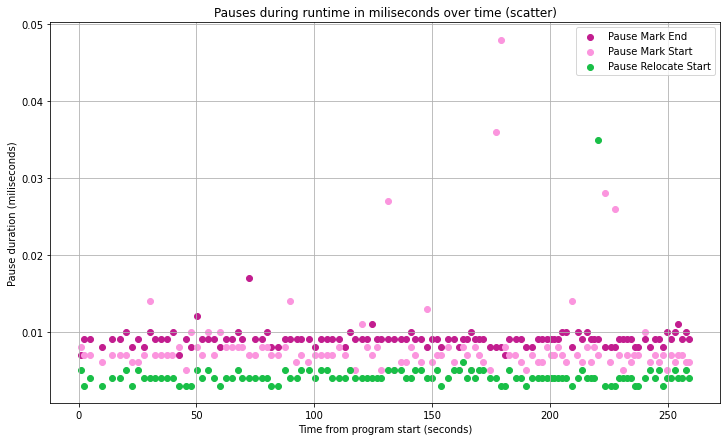

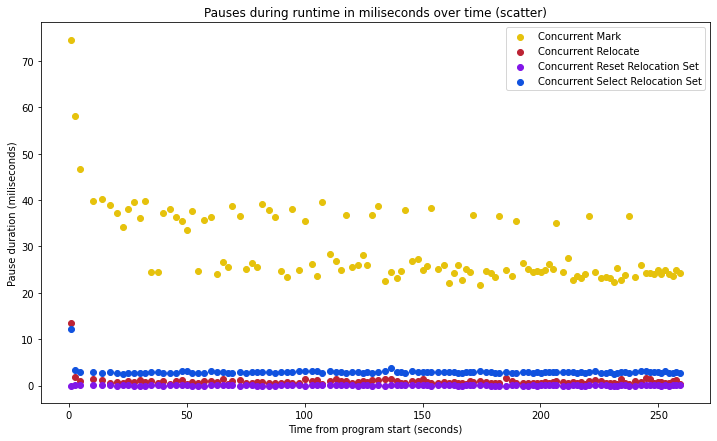

In [7]:
plt.rcParams["figure.figsize"] = [12, 7]
from graphing.scatterplot import comparrison_scatter
# Stop the world pauses. Use the seperated events to see each type of pause
if stw_seperated_tables:
    stw_time_lists, stw_duration_lists = transform.get_times_and_durations_from_event_lists(stw_seperated_tables)
    labels = transform.get_gc_event_dataframe_labels(stw_seperated_tables)
    plot = comparrison_scatter(stw_time_lists, stw_duration_lists, None, None, labels)

# Concurrent periods. Use the seperated events to see each type of concurrent duration
if concurrent_seperated_tables:
    # TODO ERROR HERE:
    c_time_lists, c_duration_lists = transform.get_times_and_durations_from_event_lists(concurrent_seperated_tables)
    labels = transform.get_gc_event_dataframe_labels(concurrent_seperated_tables)
    plot = comparrison_scatter(c_time_lists, c_duration_lists, None, None, labels)

### Time spent in Concurrent Phases vs. Stop The World phases

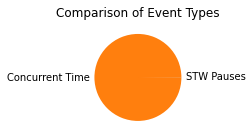

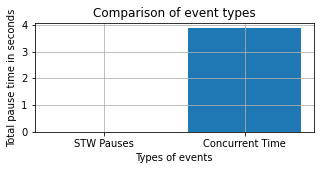

In [8]:
plt.rcParams["figure.figsize"] = [5, 2] # make this figure smaller (not needed to be large)
import numpy as np
from graphing.compare_eventtypes import compare_eventtypes_bar, compare_eventtypes_pie
_ = compare_eventtypes_pie(database_table)
_ = compare_eventtypes_bar(database_table)

plt.rcParams["figure.figsize"] = [12, 7] # Return figure to default size

### Print trends about the events based on Event Type and Name

In [10]:
# Compare stop the world vs concurrent IN GENERL (not specific sub categories)
labels = ["Pauses", "Concurrent"]
from graphing.trends import print_trends, compare_trends
print("\t\t =========== Concurrent Vs Pauses Table ===========\n")
print_title = True
if not stw_table.empty:
    stw_times,stw_durations  = transform.get_time_and_event_durations(stw_table)
    print_trends(stw_durations, "Pauses", print_title, timestamps=stw_times, )
    print_title = False
else:
    print("No STW data")
if not concurrent_table.empty:
    concurrent_times, concurrent_durations = transform.get_time_and_event_durations(concurrent_table)
    print_trends(concurrent_durations, "Concurrent", print_title)
else:
    print("No concurrent data")
print("\n\n")

if concurrent_seperated_tables:
    # Concurrent pauses comparison
    print("\t\t\t=========== Concurrent Table ===========\n")
    labels = transform.get_gc_event_dataframe_labels(concurrent_seperated_tables, eventtype = False)
    compare_trends(c_duration_lists, labels = labels)
    print("\n\n\n")

if stw_seperated_tables:
    # Stop the world pauses comparison
    labels = transform.get_gc_event_dataframe_labels(stw_seperated_tables , eventtype = False)
    print("\t\t\t=========== Pauses Table ===========\n")
    compare_trends(stw_duration_lists, labels = labels)

		 =========== Concurrent Vs Pauses Table ===========

 Trends (ms)            | Event Count  | Max Duration | Sum Duration | Mean Duration| Std Dev.     | Throughput   |
-------------------------------------------------------------------------------------------------------------------
Pauses                  | 348          | 0.048        | 2.51         | 0.0072       | 0.0043       | 100.0%       | 
Concurrent              | 464          | 74.612       | 3869.83      | 8.3402       | 12.9102      | 



			=========== Concurrent Table ===========

 Trends (ms)            | Event Count  | Max Duration | Sum Duration | Mean Duration| Std Dev.     |
----------------------------------------------------------------------------------------------------
Mark                    | 116          | 74.612       | 3421.482     | 29.4955      | 7.9453       | 
Relocate                | 116          | 13.482       | 105.145      | 0.9064       | 1.2195       | 
Reset Relocation Set    | 116          |

### Compare percentiles for pauses/concurrent phases, general and specific


In [12]:
# Compare stop the world vs concurrent IN GENERL (not specific sub categories)
labels = ["Pauses", "Concurrent"]
from graphing.percentiles import compare_pauses_percentiles
print("\t\t\t=========== Concurrent Vs Pauses ===========\n")
compare_pauses_percentiles([stw_durations, concurrent_durations], labels = labels)
print("\n\n\n")


# Concurrent pauses comparison
if concurrent_seperated_tables:
    print("\t\t\t=========== Concurrent Percentiles ===========\n")
    labels = transform.get_gc_event_dataframe_labels(concurrent_seperated_tables, eventtype = False)
    compare_pauses_percentiles(c_duration_lists, labels = labels)
    print("\n\n\n")

# Stop the world pauses comparison
if stw_seperated_tables:
    labels = transform.get_gc_event_dataframe_labels(stw_seperated_tables , eventtype = False)
    print("\t\t\t=========== Pauses Percentiles ===========\n")
    compare_pauses_percentiles(stw_duration_lists, labels = labels)




			=========== Concurrent Vs Pauses ===========

Percentiles| 50%       | 75%       | 90%       | 95%       | 99%       | 99.9%     | 99.99%    | 
------------------------------------------------------------------------------------------------
Pauses     | 0.01 ms   | 0.01 ms   | 0.01 ms   | 0.01 ms   | 0.03 ms   | 0.04 ms   | 0.05 ms   | 
Concurrent | 2.56 ms   | 15.51 ms  | 26.43 ms  | 36.69 ms  | 39.74 ms  | 66.94 ms  | 73.84 ms  | 




			=========== Concurrent Percentiles ===========

Percentiles| 50%       | 75%       | 90%       | 95%       | 99%       | 99.9%     | 99.99%    | 
------------------------------------------------------------------------------------------------
Mark       | 25.52 ms  | 36.34 ms  | 38.43 ms  | 39.63 ms  | 56.35 ms  | 72.71 ms  | 74.42 ms  | 
Relocate   | 0.74 ms   | 0.99 ms   | 1.33 ms   | 1.45 ms   | 1.86 ms   | 12.15 ms  | 13.35 ms  | 
Reset Relo | 0.0 ms    | 0.0 ms    | 0.0 ms    | 0.0 ms    | 0.01 ms   | 0.04 ms   | 0.04 ms   | 
Select Rel | 2.8

### Average time in seconds per phase  / grouping

In [13]:
import numpy as np
from graphing.compare_eventtypes import compare_averages_bar
plt.rcParams["figure.figsize"] = [12, 7]
# TODO. And save this time D:

### Show latency heatmap

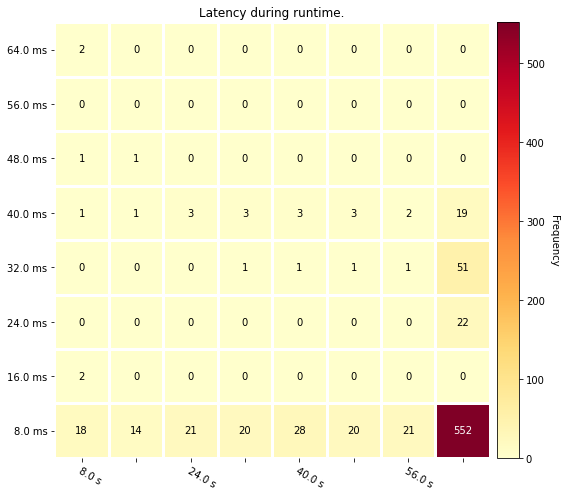

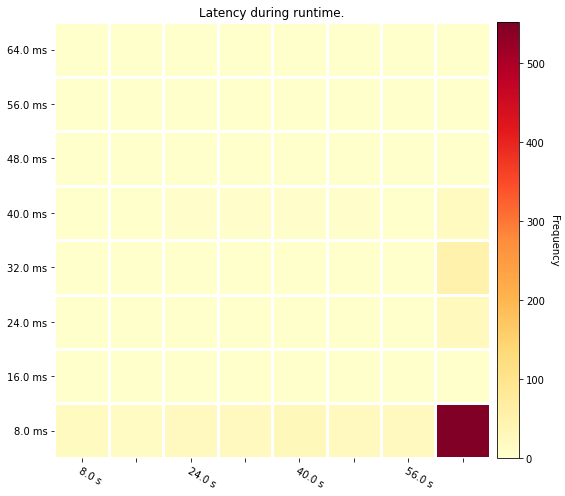

In [16]:
from graphing.heatmap import plot_heatmap
heatmap, dimensions = transform.get_heatmap_data(database_table, 8,8,8,8, True)
                                                                                       # Set true to false 
plot_heatmap(heatmap, dimensions, True)
plot_heatmap(heatmap, dimensions, False)
plt.rcParams["figure.figsize"] = [12, 7]

### Plotting bar lines to display latency: Thicker and taller means longer duration pause.

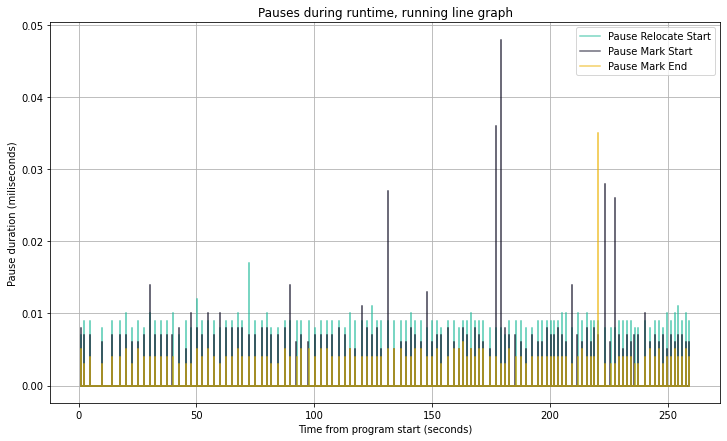

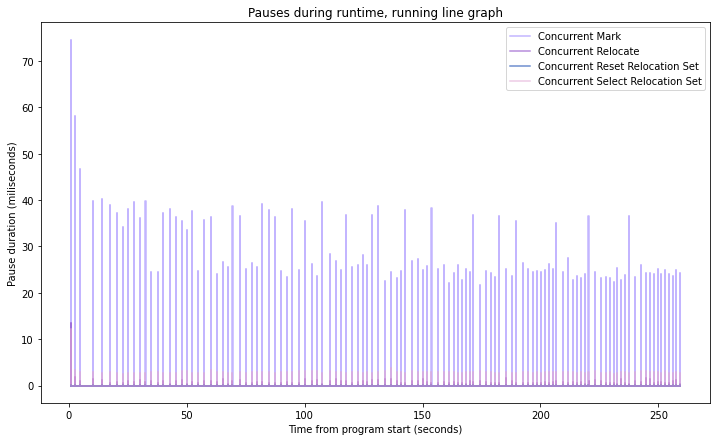

In [18]:
# Pauses during runtime
from graphing.linegraph import compare_paused_running_line

# Stop the world pauses
if stw_seperated_tables:
    labels = transform.get_gc_event_dataframe_labels(stw_seperated_tables)
    labels.reverse() 
    compare_paused_running_line(stw_time_lists, stw_duration_lists, None, None, labels, False)

# Concurrent periods
if concurrent_seperated_tables:
    labels = transform.get_gc_event_dataframe_labels(concurrent_seperated_tables)
    plot = compare_paused_running_line(c_time_lists, c_duration_lists, None, None, labels)

### Allocation over time

Warning! Maximum heap size must be manually set, and may not be correct.


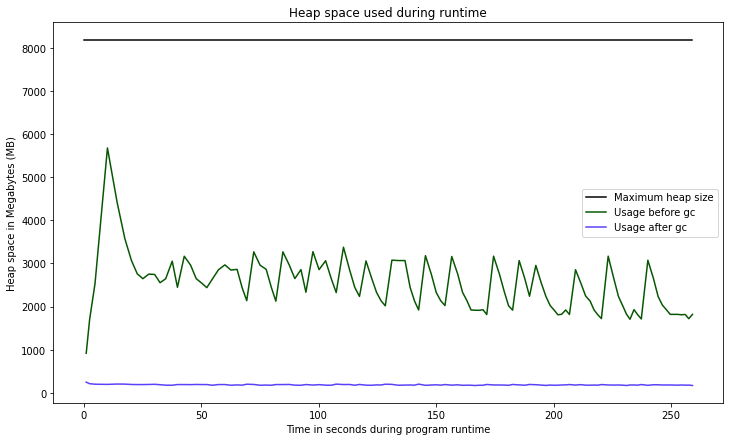

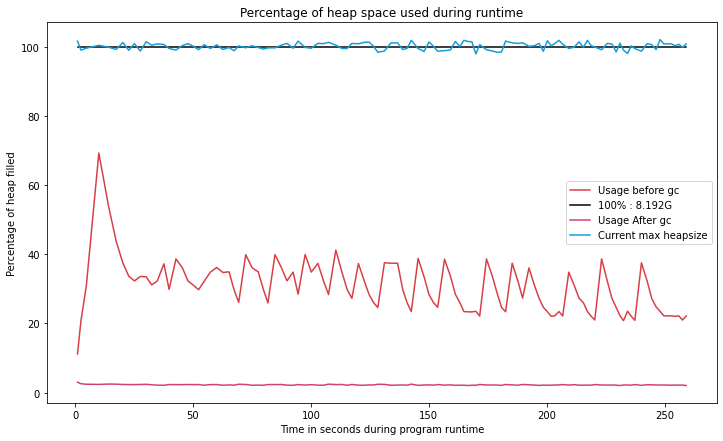

In [25]:
from graphing.heapoccupancy import plot_heap_occupancy, plot_heap_occupancy_percentage
# Access the memory changed information 
before_gc, after_gc, max_heap, times_selected = transform.get_heap_occupancy(database_table)
max_heapsize = 8.192
heapsize_unit = "G"
# TODO: It is possible for the following to all be done with a single function call, since no new data is being created. This can be a second API file
print("Warning! Maximum heap size must be manually set, and may not be correct.")
g = plot_heap_occupancy(times_selected, before_gc, "M", max_heapsize, heapsize_unit, label = "Usage before gc")
_ = plot_heap_occupancy(times_selected, after_gc, "M", max_heapsize, heapsize_unit, axs = g, label = "Usage after gc", plot_max=False)
# Create a second graph using percentages
g = plot_heap_occupancy_percentage(times_selected, before_gc, "M", max_heapsize, heapsize_unit, label = "Usage before gc")
g = plot_heap_occupancy_percentage(times_selected, after_gc, "M", max_heapsize, heapsize_unit, label = "Usage After gc", axs = g, plot_max = False)
g = plot_heap_occupancy_percentage(times_selected, max_heap, "M", max_heapsize, heapsize_unit, label = "Current max heapsize", axs = g, plot_max = False)
#allo = upl.getHeapAllocation(path1)

### Reclaimed bytes

<AxesSubplot:title={'center':'Pauses during runtime in miliseconds over time (scatter)'}, xlabel='Time from program start (seconds)', ylabel='Pause duration (miliseconds)'>

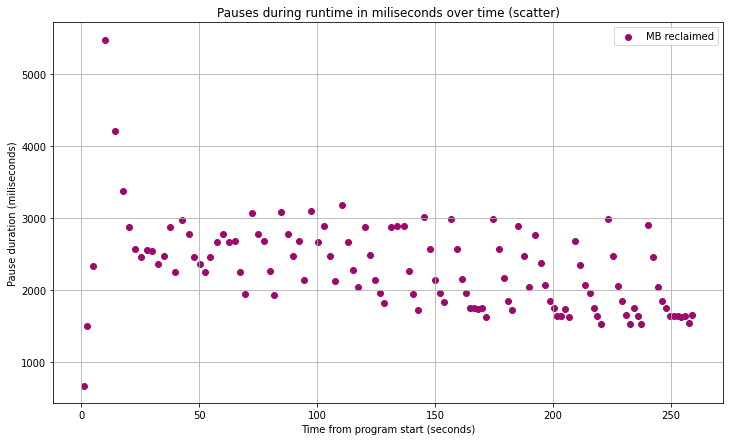

In [26]:
from graphing.scatterplot import plot_pauses_scatter
reclaimed, time_seconds = transform.get_reclaimed_mb_over_time(database_table)
f, axs = plt.subplots()
plot_pauses_scatter(time_seconds, reclaimed, axs=axs, label = "MB reclaimed")

### Frequencies of STW pauses (X ms buckets)

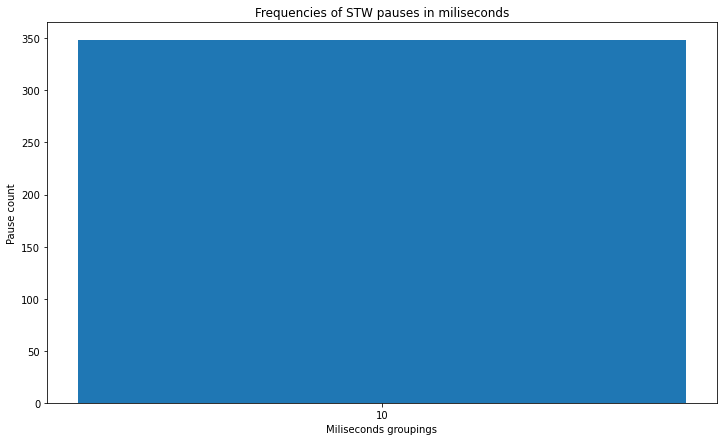

In [27]:
### Frequencies of STW pauses (X ms buckets)
bucket_size_ms = 10
buckets = transform.group_into_pause_buckets(stw_table, bucket_size_ms)
#######
fig, ax = plt.subplots()
labels = [str(i * bucket_size_ms)  for i in range(1, len(buckets ) + 1)]
ax.bar(labels, height = buckets, align = 'center')
ax.set_xlabel('Miliseconds groupings')
ax.set_ylabel("Pause count")
_ = ax.set_title('Frequencies of STW pauses in miliseconds')
#fig.autofmt_xdate() # Used if labels are crowded. Enable to auto format rotate labels to fit more cleanly.
